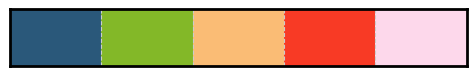

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import seaborn as sns
import re
import os
import json
import re
import jsonpickle
import sys
import glob
from statistics import mean, stdev, median
import pandas as pd
sys.path.append(r'..')

%load_ext autoreload
%autoreload 2
import sns_configs
from process_data import identify_algorithms
sns.set(rc={'text.usetex' : True})

# Mix Data


In [2]:
plt.rcParams['figure.figsize'] = 7, 3
data_dirs = [
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-splice"),
    os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/closure-48h"),
    os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/closure-ze-48h"),
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430-24-2"),
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430-24-3"),
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-m510-48"),
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-m510-mix2"),
]
output_dir = os.path.join(os.path.expanduser("~"), data_dirs[0], "fig")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

algorithms = identify_algorithms(data_dirs)
print("Identified algorithms: ", algorithms)

from process_data import generate_cov_table, visualize_cov_distribution

print(algorithms)
result = generate_cov_table(data_dirs, sorted(algorithms))
# visualize_cov_distribution(output_dir, result)


## JGraph- algorithms / check generator.


Identified algorithms:  {'zeugma-linked-testWithGenerator', 'ei-testWithGenerator', 'zest-testWithGenerator', 'zeugma-none-testWithGenerator', 'bedivfuzz-simple-testWithGenerator', 'bedivfuzz-structure-testWithGenerator'}
{'zeugma-linked-testWithGenerator', 'ei-testWithGenerator', 'zest-testWithGenerator', 'zeugma-none-testWithGenerator', 'bedivfuzz-simple-testWithGenerator', 'bedivfuzz-structure-testWithGenerator'}
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-testWithGenerator
bedivfuzz-simple-tes

In [5]:
display(result[1])

,Benchmark,Algorithm,Ratio
0,closure\n 0,EI,24459.40
1,closure\n 0,Zest,24433.05
2,closure\n 0,bedivfuzz-simple-testWithGenerator,24094.45
3,closure\n 0,bedivfuzz-structure-testWithGenerator,23857.30
4,closure\n 0,zeugma-linked-testWithGenerator,25274.25
5,closure\n 0,zeugma-none-testWithGenerator,24577.65


In [11]:
from process_data import generate_graph

generate_graph(data_dirs, algorithms, output_dir)

# unix_time total_inputs
# unix_time all_covered_probes
# unix_time total_inputs
# unix_time all_covered_probes
# unix_time total_inputs
# unix_time all_covered_probes
# unix_time total_inputs
# unix_time all_covered_probes
# unix_time total_inputs
# unix_time all_covered_probes
# unix_time total_inputs
# unix_time all_covered_probes
# unix_time total_inputs
# unix_time all_covered_probes


<Figure size 504x216 with 0 Axes>

In [9]:
from process_data import generate_corpus_exec_time, generate_perf_graph

data_dirs = [
    os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430-rep1"),
]
output_dir = os.path.join(os.path.expanduser("~"), data_dirs[0], "fig")
generate_perf_graph(data_dirs, ['zest-testWithGenerator', "ei-no-havoc-testWithGenerator"], output_dir, "exec_time")

       case   result  class   cov  time       algorithm
0        10  INVALID    NaN  2638    19            Zest
1        11  SUCCESS    NaN  2638     8            Zest
2        12  SUCCESS    NaN  2638     7            Zest
3        13  SUCCESS    NaN  2638     8            Zest
4        14  SUCCESS    NaN  2697     9            Zest
...     ...      ...    ...   ...   ...             ...
38515  2093  INVALID    NaN  8538    33  $\textsc{Gex}$
38516  2094  SUCCESS    NaN  8538    11  $\textsc{Gex}$
38517  2095  SUCCESS    NaN  8538     3  $\textsc{Gex}$
38518  2096  INVALID    NaN  8538     1  $\textsc{Gex}$
38519  2097  SUCCESS    NaN  8538     3  $\textsc{Gex}$

[38520 rows x 6 columns]


In [8]:

from process_data import generate_corpus_exec_time, generate_perf_graph


data_dir = os.path.join(os.path.expanduser("~"), "repos/cloudlab/results-JQF/ei-48h-11-22-p")
generate_perf_graph(data_dir, algorithms, output_dir, "perf")

ValueError: No objects to concatenate

# RQ1: How destructive are Zest's mutations in general? Are distruptive mutaions beneficial for fuzzing?

jython


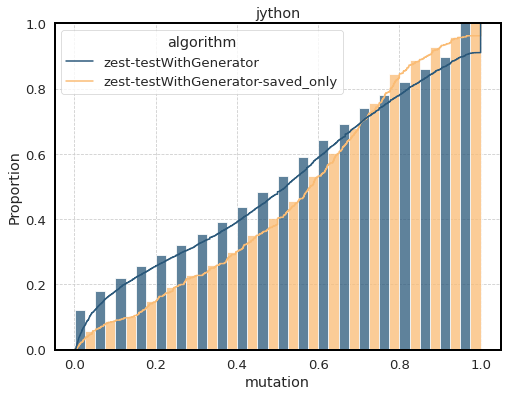

In [11]:
from process_data import parse_and_visualize_mutation_data

parse_and_visualize_mutation_data("/data/aoli/results-JQF/ei-m510-jythonm/", [False, True], ["testWithGenerator"], ["zest"])

# RQ2: Can we reduce the dstructiveness of Zest mutations via execution indexing?

jython


/usr0/home/aoli/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


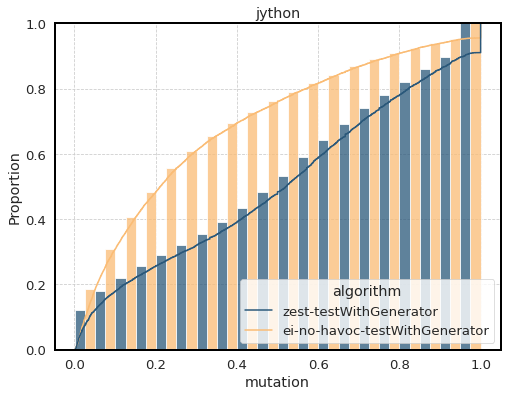

In [13]:
from process_data import parse_and_visualize_mutation_data

parse_and_visualize_mutation_data("/data/aoli/results-JQF/ei-m510-jythonm/", [False], ["testWithGenerator"], ["zest", "ei-no-havoc"])

# RQ3: What is the impact of the havoc effect on fuzzing?

In [3]:
data_dirs = [
    os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-m510-48"),
]
output_dir = os.path.join(os.path.expanduser("~"), data_dirs[0], "fig")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

algorithms = identify_algorithms(data_dirs)
print("Identified algorithms: ", algorithms)

from process_data import generate_cov_table, visualize_cov_distribution

print(algorithms)
result = generate_cov_table(data_dirs, sorted(algorithms), output_dir)
# visualize_cov_distribution(output_dir, result)


## JGraph- algorithms / check generator.

Identified algorithms:  {'ei-testWithGenerator', 'blind-testWithGenerator', 'mix-testWithGenerator', 'zest-testWithGenerator'}
{'ei-testWithGenerator', 'blind-testWithGenerator', 'mix-testWithGenerator', 'zest-testWithGenerator'}
|Dataset|Blind|Delta| EI  |Delta| Mix |Delta|Zest |Delta|
|-------|----:|----:|----:|----:|----:|----:|----:|----:|
|ant    | 5346|    0| 5627|  281| 5635|  289| 5649|  303|
|maven  | 2854|    0| 4124| 1270| 4126| 1272| 4126| 1272|
|rhino  | 7434|    0| 8166|  732| 8146|  712| 8184|  750|
|closure|22808|    0|24542| 1734|24409| 1601|24477| 1669|
|chocopy| 1810|    0| 1813|    3| 1817|    7| 1819|    9|
|gson   |  474|    0|  475|    1|  475|    1|  475|    1|
|jackson| 1708|    0| 1717|    9| 1718|   10| 1718|   10|
